# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Nurus Shobah Hidayati]
- **Email:** [justnoteeet0.0@gmail.com]
- **ID Dicoding:** [shobaaa]

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola penyewaan sepeda antara tahun 2011 dan 2012?
- Bagaimana pola penyewaan sepeda bulanan selama dua tahun terakhir?
- Apakah ada perbedaan signifikan jumlah penyewaan antar musim?
- Seberapa besar pengaruh suhu, kelembaban, angin, dan kondisi cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana rata-rata pola penggunaan sepeda dalam satu hari (24 jam)?
- Hari apa yang memiliki jumlah penyewaan sepeda paling tinggi dalam seminggu?
- Apakah terdapat lonjakan tidak biasa pada jam atau hari tertentu?
- Apakah terdapat perbedaan perilaku antara pengguna kasual dan terdaftar dalam sehari?
- Bagaimana proporsi dan pertumbuhan pengguna kasual dan terdaftar dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

###Gathering Data

In [ ]:
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour = pd.read_csv('hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data yang digunakan adalah Bike Sharing Dataset dan terdapat dua file, yakni day.csv dan hour.csv
- Kedua file memiliki struktur kolom yang mirip, namun hour.csv memiliki tambahan kolom hr (jam).

###Assessing Data

Menilai tabel df_day

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_day[df_day['hum'] == 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


In [ ]:
print('Jumlah duplikasi: ', df_day.duplicated().sum())

Jumlah duplikasi:  0


Menilai tabel df_hour

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df_hour[df_hour['hum'] == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


In [ ]:
print('Jumlah duplikasi: ', df_hour.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak terdapat missing value pada kedua file data
- Pada tabel df_day terdapat inaccurate value pada kolom 'hum' yang mana ini tidak mungkin memiliki humidity atau kelembapan 0 dan kesalahan ini terjadi sebanyak satu kali (1 row)
- Pada tabel df_hour terdapat inaccurate value pada kolom 'hum' yang mana bernilai 0 sebanyak 24 kali (sehari penuh) pada nilai 'dteday' yang sama dengan tabel df_day
- Kedua tabel (df_day dan df_hour) tidak memiliki duplikat

### Cleaning Data

**Membersihkan tabel df_day**

Memperbaiki Inaccurate value

In [ ]:
median = df_day[df_day['hum'] > 0]['hum'].median()
df_day.loc[df_day['hum'] == 0, 'hum'] = median

In [ ]:
df_day[df_day['hum'] == 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628752,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627083,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Memperbaiki tipe data df_day

In [ ]:
kategori = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_day[kategori] = df_day[kategori].astype('category')

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    category
 4   mnth        731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 58.0+ KB


**Membersihkan tabel data df_hour**

Memperbaiki Inaccurate value

In [ ]:
median = df_hour[df_hour['hum'] > 0]['hum'].median()
df_hour.loc[df_hour['hum'] == 0, 'hum'] = median

In [ ]:
df_hour[df_hour['hum'] == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628026,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Memperbaiki tipe data df_hour

In [ ]:
kategori = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_hour[kategori] = df_hour[kategori].astype('category')

In [ ]:
datetime_columns = ['dteday']
df_hour[datetime_columns] = df_hour[datetime_columns].apply(pd.to_datetime, format='%Y-%m-%d')

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada tabel df_day dan df_hour, nilai 0 pada kolom hum (humidity) yang merupakan inaccurate value telah diganti dengan nilai median dari kolom hum yang memiliki nilai lebih dari 0.
- Beberapa kolom pada tabel df_day dan df_hour yang bersifat kategorikal (season, yr, mnth, holiday, weekday, workingday, weathersit) telah diubah tipe datanya menjadi category.
- Pada tabel df_hour tipe data kolom 'dteday' diubah dari object ke datetime.

## Exploratory Data Analysis (EDA)

### Explore df_day

In [ ]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.628752,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.627083,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day['day_name'] = df_day['dteday'].dt.day_name()
display(df_day.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_name
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday


In [ ]:
kolom = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'day_name']
for col in kolom:
    display(f"jumlah nilai di kolom '{col}':")
    display(df_day[col].value_counts())

"jumlah nilai di kolom 'season':"

,count
season,
3,188
2,184
1,181
4,178


"jumlah nilai di kolom 'yr':"

,count
yr,
1,366
0,365


"jumlah nilai di kolom 'mnth':"

,count
mnth,
1,62
3,62
7,62
5,62
12,62
10,62
8,62
4,60
9,60


"jumlah nilai di kolom 'holiday':"

,count
holiday,
0,710
1,21


"jumlah nilai di kolom 'weekday':"

,count
weekday,
0,105
1,105
6,105
2,104
3,104
4,104
5,104


"jumlah nilai di kolom 'workingday':"

,count
workingday,
1,500
0,231


"jumlah nilai di kolom 'weathersit':"

,count
weathersit,
1,463
2,247
3,21


"jumlah nilai di kolom 'day_name':"

,count
day_name,
Saturday,105
Sunday,105
Monday,105
Tuesday,104
Wednesday,104
Thursday,104
Friday,104


In [ ]:
season_rental = df_day.groupby('season', observed=True).agg({
    'cnt': ['max', 'min', 'mean', 'sum'],
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})
display(season_rental)

cnt                             casual                            \
         max   min         mean      sum    max  min         mean     sum   
season                                                                      
1       7836   431  2604.132597   471348   3155    9   334.928177   60622   
2       8362   795  4992.331522   918589   3410  120  1106.097826  203522   
3       8714  1115  5644.303191  1061129   3160  118  1202.611702  226091   
4       8555    22  4728.162921   841613   3031    2   729.112360  129782   

       registered                            
              max  min         mean     sum  
season                                       
1            5315  416  2269.204420  410726  
2            6456  674  3886.233696  715067  
3            6917  889  4441.691489  835038  
4            6946   20  3999.050562  711831

In [ ]:
year_rental = df_day.groupby('yr', observed=True).agg({
    'cnt': ['max', 'min', 'mean', 'sum'],
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})
display(year_rental)

cnt                            casual                           \
     max  min         mean      sum    max min         mean     sum   
yr                                                                    
0   6043  431  3405.761644  1243103   3065   9   677.402740  247252   
1   8714   22  5599.934426  2049576   3410   2  1018.483607  372765   

   registered                             
          max  min         mean      sum  
yr                                        
0        4614  416  2728.358904   995851  
1        6946   20  4581.450820  1676811

In [ ]:
month_rental = df_day.groupby('mnth', observed=True).agg({
    'cnt': ['max', 'min', 'mean', 'sum'],
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})
display(month_rental)

cnt                            casual                           \
       max   min         mean     sum    max  min         mean    sum   
mnth                                                                    
1     4521   431  2176.338710  134933   1070    9   194.225806  12042   
2     5062  1005  2655.298246  151352   1435   47   262.508772  14963   
3     8362   605  3692.258065  228920   3155   46   716.838710  44444   
4     7460   795  4484.900000  269094   3252  120  1013.366667  60802   
5     8294  2633  5349.774194  331686   3410  255  1214.274194  75285   
6     8120  3767  5772.366667  346342   2963  477  1231.766667  73906   
7     8173  3285  5563.677419  344948   3065  562  1260.596774  78157   
8     7865  1115  5664.419355  351194   2827  226  1161.919355  72039   
9     8714  1842  5766.516667  345991   3160  118  1172.050000  70323   
10    8156    22  5199.225806  322352   3031    2   963.870968  59760   
11    6852  1495  4247.183333  254831   2290   69   610.050000  36603   
12    6606   441  3403.806452  211036   1153    9   349.887097  21693   

     registered                             
            max   min         mean     sum  
mnth                                        
1          4185   416  1982.112903  122891  
2          4546   905  2392.789474  136389  
3          5893   491  2975.419355  184476  
4          5950   674  3471.533333  208292  
5          6433  2213  4135.500000  256401  
6          6456  2993  4540.600000  272436  
7          6790  2298  4303.080645  266791  
8          6541   889  4502.500000  279155  
9          6946  1689  4594.466667  275668  
10         6911    20  4235.354839  262592  
11         5520   935  3637.133333  218228  
12         6055   432  3053.919355  189343

In [ ]:
holiday_rental = df_day.groupby('holiday', observed=True).agg({
    'cnt': ['max', 'min', 'mean', 'sum'],
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})
display(holiday_rental)

cnt                             casual                            \
          max   min         mean      sum    max  min         mean     sum   
holiday                                                                      
0        8714    22  4527.104225  3214244   3410    2   841.771831  597658   
1        7403  1000  3735.000000    78435   3065  117  1064.714286   22359   

        registered                             
               max  min         mean      sum  
holiday                                        
0             6946   20  3685.332394  2616586  
1             5172  573  2670.285714    56076

In [ ]:
workingday_rental = df_day.groupby('workingday', observed=True).agg({
    'cnt': ['max', 'min', 'mean', 'sum'],
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})
display(workingday_rental)

cnt                            casual                           \
             max  min         mean      sum    max min         mean     sum   
workingday                                                                    
0           8714  605  4330.168831  1000269   3410  54  1371.134199  316732   
1           8362   22  4584.820000  2292410   2469   2   606.570000  303285   

           registered                             
                  max  min         mean      sum  
workingday                                        
0                5966  451  2959.034632   683537  
1                6946   20  3978.250000  1989125

In [ ]:
weather_rental = df_day.groupby('weathersit', observed=True).agg({
    'cnt': ['max', 'min', 'mean', 'sum'],
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})
display(weather_rental)

cnt                            casual                          \
             max  min         mean      sum    max min        mean     sum   
weathersit                                                                   
1           8714  431  4876.786177  2257952   3410  15  964.030238  446346   
2           8362  605  4035.862348   996858   3155   9  687.352227  169776   
3           4639   22  1803.285714    37869   1264   2  185.476190    3895   

           registered                             
                  max  min         mean      sum  
weathersit                                        
1                6946  416  3912.755940  1811606  
2                6844  491  3348.510121   827082  
3                4324   20  1617.809524    33974

In [ ]:
day_rental = df_day.groupby('day_name', observed=True).agg({
    'cnt': ['max', 'min', 'mean', 'sum'],
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})
display(day_rental)

cnt                            casual                           \
            max   min         mean     sum    max min         mean     sum   
day_name                                                                     
Friday     8362  1167  4690.288462  487790   2469  38   752.288462   78238   
Monday     7525    22  4338.123810  455503   3065   2   674.133333   70784   
Saturday   8714   627  4550.542857  477807   3410  57  1465.257143  153852   
Sunday     8227   605  4228.828571  444027   3283  54  1338.295238  140521   
Thursday   7804   431  4667.259615  485395   1405  15   590.961538   61460   
Tuesday    7767   683  4510.663462  469109   1348   9   556.182692   57843   
Wednesday  8173   441  4548.538462  473048   2562   9   551.144231   57319   

          registered                             
                 max   min         mean     sum  
day_name                                         
Friday          6917  1129  3938.000000  409552  
Monday          6435    20  3663.990476  384719  
Saturday        5966   570  3085.285714  323955  
Sunday          5657   451  2890.533333  303506  
Thursday        6781   416  4076.298077  423935  
Tuesday         6697   573  3954.480769  411266  
Wednesday       6946   432  3997.394231  415729

In [ ]:
display("Correlation Matrix:")
display(df_day.corr(numeric_only=True))

'Correlation Matrix:'

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.150580,0.152638,0.007999,-0.112620,0.275255,0.659623,0.628830
temp,0.150580,1.000000,0.991702,0.125140,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.991702,1.000000,0.138565,-0.183643,0.543864,0.544192,0.631066
hum,0.007999,0.125140,0.138565,1.000000,-0.246238,-0.085197,-0.104392,-0.114276
windspeed,-0.112620,-0.157944,-0.183643,-0.246238,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.543285,0.543864,-0.085197,-0.167613,1.000000,0.395282,0.672804
registered,0.659623,0.540012,0.544192,-0.104392,-0.217449,0.395282,1.000000,0.945517
cnt,0.628830,0.627494,0.631066,-0.114276,-0.234545,0.672804,0.945517,1.000000


### Explore df_hour

In [ ]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.000000,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,NaN,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,7.0,NaN,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,NaN,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.628026,0.214433,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour['day_name_hour'] = df_hour['dteday'].dt.day_name()
display(df_hour.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_name_hour
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.194,3,13,16,Saturday
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.194,8,32,40,Saturday
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.194,5,27,32,Saturday
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.194,3,10,13,Saturday
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.194,0,1,1,Saturday


In [ ]:
hour_rental = df_hour.groupby('hr').agg({
    'cnt': ['max', 'min', 'mean', 'sum'],
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})
display(hour_rental)

cnt                         casual                       registered      \
    max min        mean     sum    max min       mean    sum        max min   
hr                                                                            
0   283   2   53.898072   39130     68   0  10.158402   7375        234   0   
1   168   1   33.375691   24164     49   0   6.504144   4709        139   0   
2   132   1   22.869930   16352     44   0   4.772028   3412        104   0   
3    79   1   11.727403    8174     26   0   2.715925   1893         61   0   
4    28   1    6.352941    4428     13   0   1.253945    874         22   0   
5    66   1   19.889819   14261     16   0   1.411437   1012         64   0   
6   213   1   76.044138   55132     19   0   4.161379   3017        203   0   
7   596   1  212.064649  154171     40   0  11.055021   8037        572   1   
8   839   5  359.011004  261001     69   0  21.679505  15761        808   4   
9   426  14  219.309491  159438    142   0  30.891334  22458        399   6   
10  539   8  173.668501  126257    209   0  46.477304  33789        351   8   
11  663  10  208.143054  151320    268   0  59.540578  43286        446   5   
12  776   3  253.315934  184414    362   0  68.293956  49718        526   3   
13  760  11  253.661180  184919    355   0  72.308642  52713        491   9   
14  750  12  240.949246  175652    361   0  75.567901  55089        502  12   
15  750   7  251.233196  183149    357   0  74.905350  54606        456   4   
16  783  11  311.983562  227748    367   0  73.745205  53834        481   8   
17  976  15  461.452055  336860    347   0  74.273973  54220        885  14   
18  977  23  425.510989  309772    266   0  61.120879  44496        886  20   
19  743  11  311.523352  226789    230   0  48.770604  35505        662  11   
20  567  11  226.030220  164550    237   0  36.233516  26378        461   8   
21  584   6  172.314560  125445    222   0  28.255495  20570        362   6   
22  502   9  131.335165   95612    175   0  22.252747  16200        327   5   
23  256   2   87.831044   63941     71   0  15.199176  11065        220   2   

                        
          mean     sum  
hr                      
0    43.739669   31755  
1    26.871547   19455  
2    18.097902   12940  
3     9.011478    6281  
4     5.098996    3554  
5    18.478382   13249  
6    71.882759   52115  
7   201.009629  146134  
8   337.331499  245240  
9   188.418157  136980  
10  127.191197   92468  
11  148.602476  108034  
12  185.021978  134696  
13  181.352538  132206  
14  165.381344  120563  
15  176.327846  128543  
16  238.238356  173914  
17  387.178082  282640  
18  364.390110  265276  
19  262.752747  191284  
20  189.796703  138172  
21  144.059066  104875  
22  109.082418   79412  
23   72.631868   52876

In [ ]:
display("Correlation Matrix:")
display(df_hour.corr(numeric_only=True))

'Correlation Matrix:'

,instant,hr,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,-0.004775,0.136178,0.137615,0.003729,-0.070097,0.158295,0.282046,0.278379
hr,-0.004775,1.000000,0.137603,0.133750,-0.277959,0.116178,0.301202,0.374141,0.394071
temp,0.136178,0.137603,1.000000,0.987672,-0.072686,-0.037895,0.459616,0.335361,0.404772
atemp,0.137615,0.133750,0.987672,1.000000,-0.054451,-0.068885,0.454080,0.332559,0.400929
hum,0.003729,-0.277959,-0.072686,-0.054451,1.000000,-0.287648,-0.352211,-0.279294,-0.328793
windspeed,-0.070097,0.116178,-0.037895,-0.068885,-0.287648,1.000000,0.078387,0.065535,0.075992
casual,0.158295,0.301202,0.459616,0.454080,-0.352211,0.078387,1.000000,0.506618,0.694564
registered,0.282046,0.374141,0.335361,0.332559,-0.279294,0.065535,0.506618,1.000000,0.972151
cnt,0.278379,0.394071,0.404772,0.400929,-0.328793,0.075992,0.694564,0.972151,1.000000


**Insight:**
- Jumlah total penyewaan sepeda meningkat signifikan dari 1.243.103 di tahun 2011 menjadi 2.049.576 di tahun 2012.
- Jumlah pengguna kasual meningkat dari 247.252 (2011) menjadi 372.765 (2012), dan pengguna terdaftar meningkat dari 995.851 (2011) menjadi 1.676.811 (2012).
- Rata-rata penyewaan harian tertinggi terjadi di Musim Panas (5644), diikuti Musim Gugur (4992), Musim Semi (4728), dan terendah di Musim Dingin (2604).
- Rata-rata penyewaan harian tertinggi terjadi pada kondisi cuaca 1 (cerah/sebagian berawan) (4877), sementara terendah pada kondisi cuaca 3 (hujan ringan/salju ringan) (1803).
-  Rata-rata penyewaan harian tertinggi terjadi pada hari Sabtu (4551) dan Minggu (4229).
- Korelasi pengguna terdaftar (registered) dengan total penyewaan harian sangat tinggi (0.95).
- Pola rata-rata penyewaan per jam menunjukkan puncak sekitar jam 8 pagi (359) dan jam 5-6 sore (461-425).
- Pengguna terdaftar (registered) memiliki puncak penggunaan saat jam 8 pagi dan 5-6 sore. Pengguna kasual (casual) memiliki puncak penggunaan di sore hari (sekitar jam 2-4 sore).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan pola penyewaan sepeda antara tahun 2011 dan 2012?

/tmp/ipython-input-30-2989219488.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rental_by_year = df_day.groupby('yr')['cnt'].sum().reset_index()


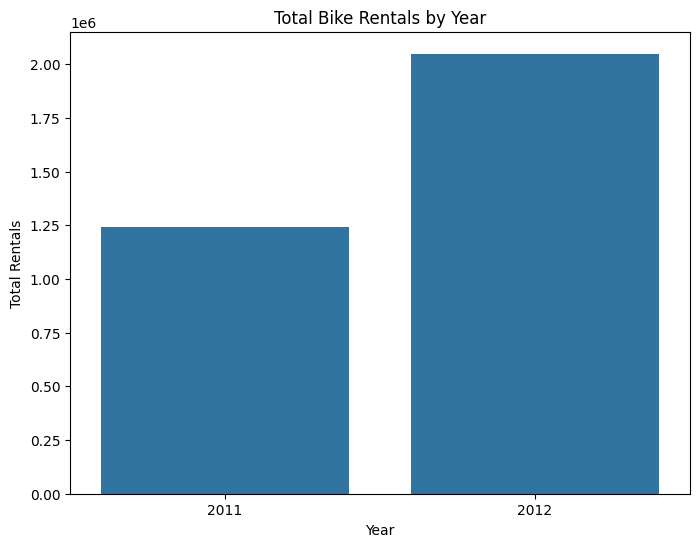

In [ ]:
rental_by_year = df_day.groupby('yr')['cnt'].sum().reset_index()
rental_by_year['yr'] = rental_by_year['yr'].map({0: 2011, 1: 2012})

plt.figure(figsize=(8, 6))
sns.barplot(x='yr', y='cnt', data=rental_by_year)
plt.xlabel('Year')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Year')
plt.show()

### Pertanyaan 2: Bagaimana pola penyewaan sepeda bulanan selama dua tahun terakhir?

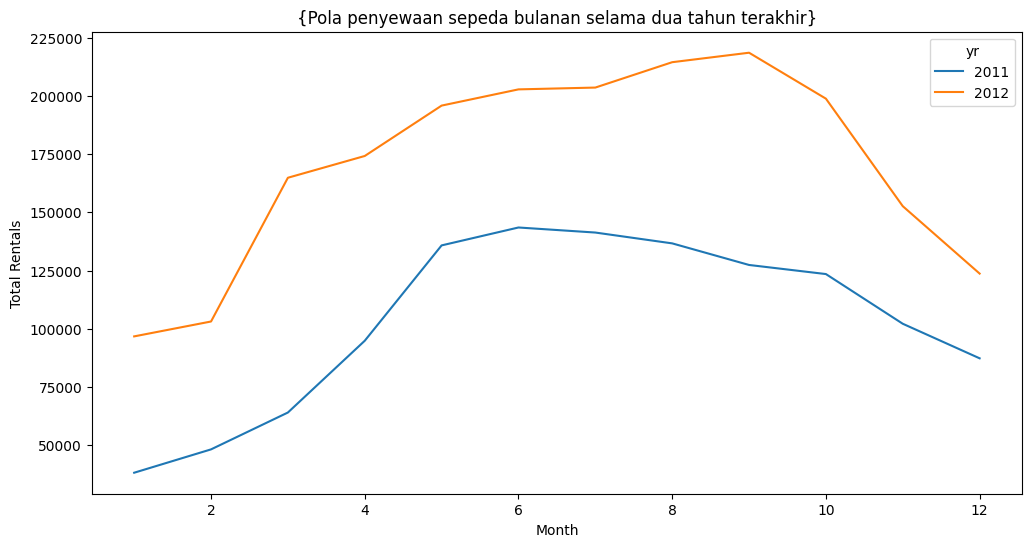

In [ ]:
monthly_rentals = df_day.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()
monthly_rentals['yr'] = monthly_rentals['yr'].map({0: 2011, 1: 2012})

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_rentals, x='mnth', y='cnt', hue='yr')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.title('{Pola penyewaan sepeda bulanan selama dua tahun terakhir}')
plt.show()

### Pertanyaan 3: Apakah ada perbedaan signifikan jumlah penyewaan antar musim?

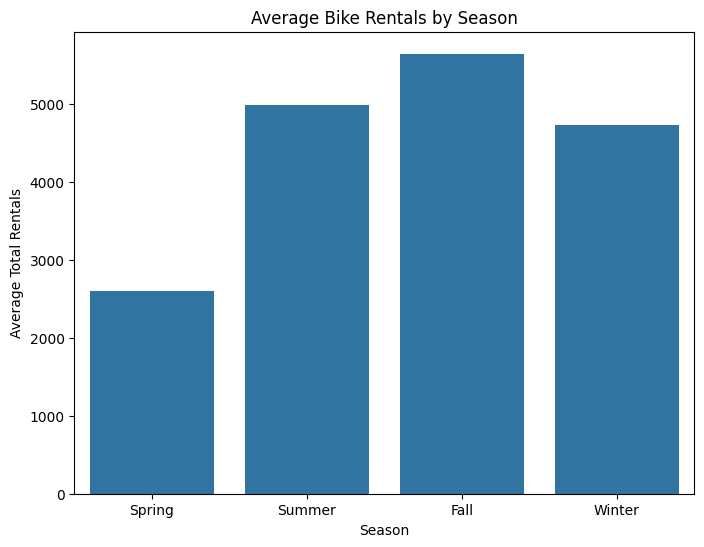

In [ ]:
seasonal_rentals_mean = df_day.groupby('season', observed=True)['cnt'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=seasonal_rentals_mean)
plt.xlabel('Season')
plt.ylabel('Average Total Rentals')
plt.title('Average Bike Rentals by Season')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

### Pertanyaan 4: Seberapa besar pengaruh suhu, kelembaban, angin, dan kondisi cuaca terhadap jumlah penyewaan sepeda?

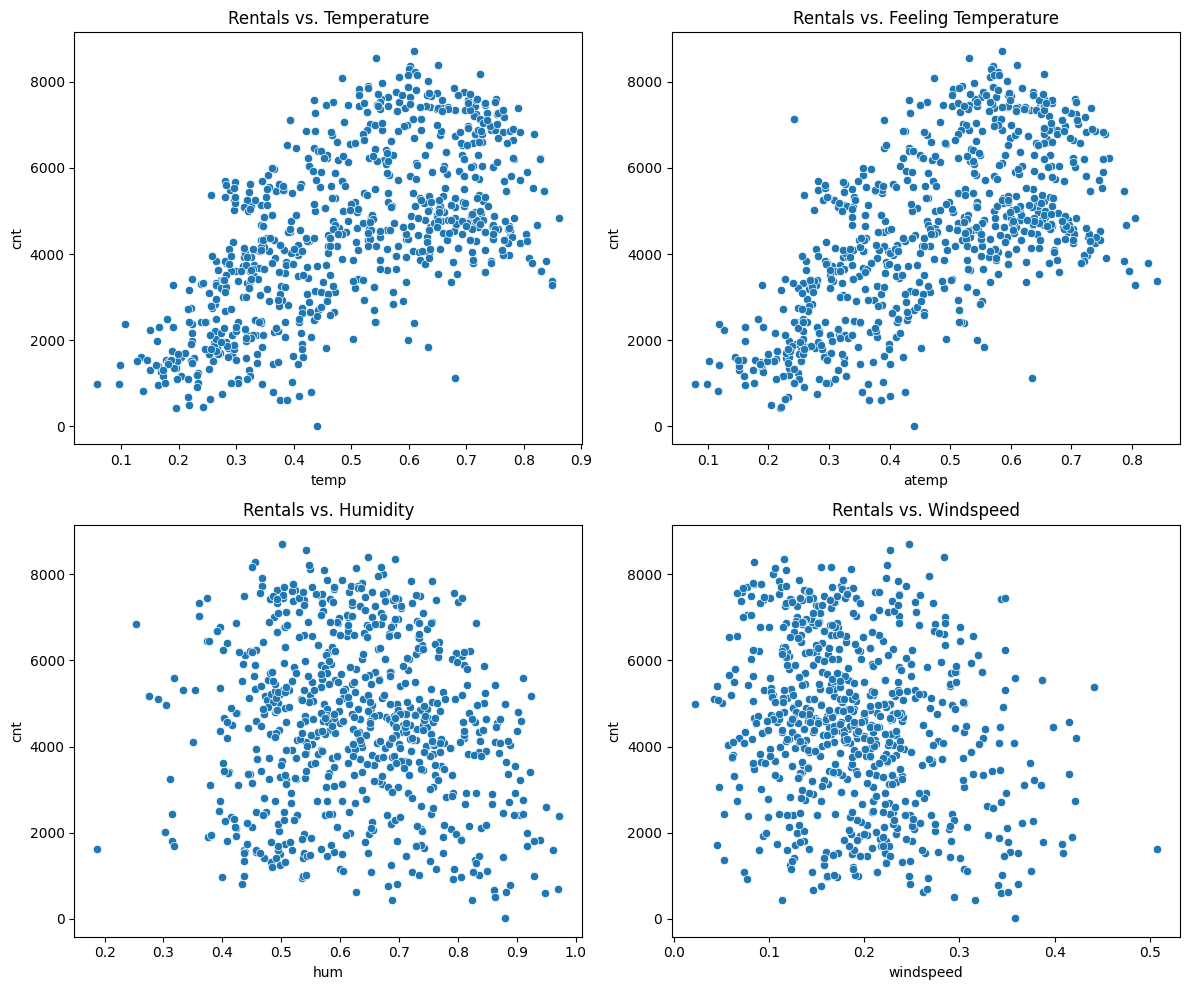

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.scatterplot(x='temp', y='cnt', data=df_day, ax=axes[0, 0])
axes[0, 0].set_title('Rentals vs. Temperature')
sns.scatterplot(x='atemp', y='cnt', data=df_day, ax=axes[0, 1])
axes[0, 1].set_title('Rentals vs. Feeling Temperature')
sns.scatterplot(x='hum', y='cnt', data=df_day, ax=axes[1, 0])
axes[1, 0].set_title('Rentals vs. Humidity')
sns.scatterplot(x='windspeed', y='cnt', data=df_day, ax=axes[1, 1])
axes[1, 1].set_title('Rentals vs. Windspeed')
plt.tight_layout()
plt.show()

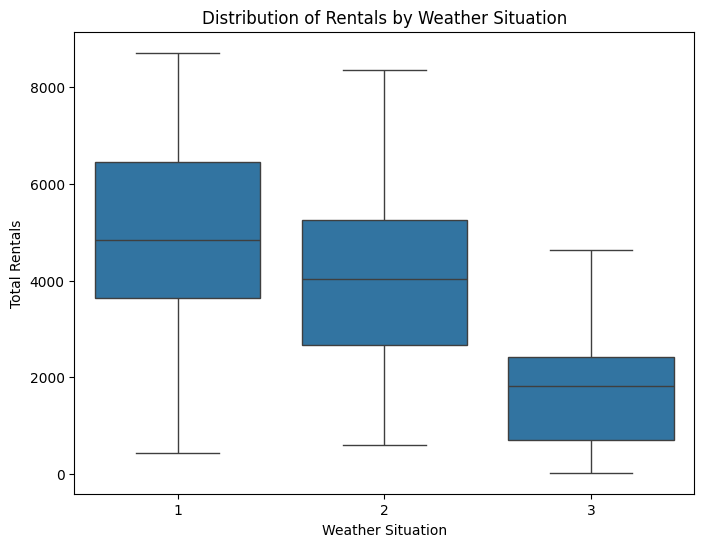

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_day)
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')
plt.title('Distribution of Rentals by Weather Situation')
plt.show()

### Pertanyaan 5: Bagaimana rata-rata pola penggunaan sepeda dalam satu hari (24 jam)?

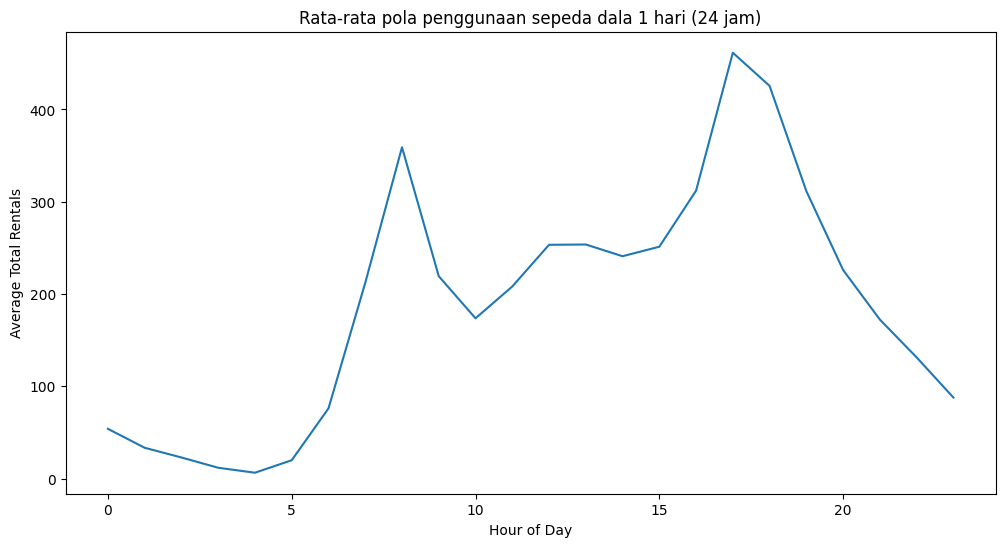

In [ ]:
hourly_rentals = df_hour.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals, x='hr', y='cnt')
plt.xlabel('Hour of Day')
plt.ylabel('Average Total Rentals')
plt.title('Rata-rata pola penggunaan sepeda dala 1 hari (24 jam)')
plt.show()

### Pertanyaan 6: Hari apa yang memiliki jumlah penyewaan sepeda paling tinggi dalam seminggu?

/tmp/ipython-input-103-908557853.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_rentals = df_day.groupby('weekday')['cnt'].mean().reset_index()


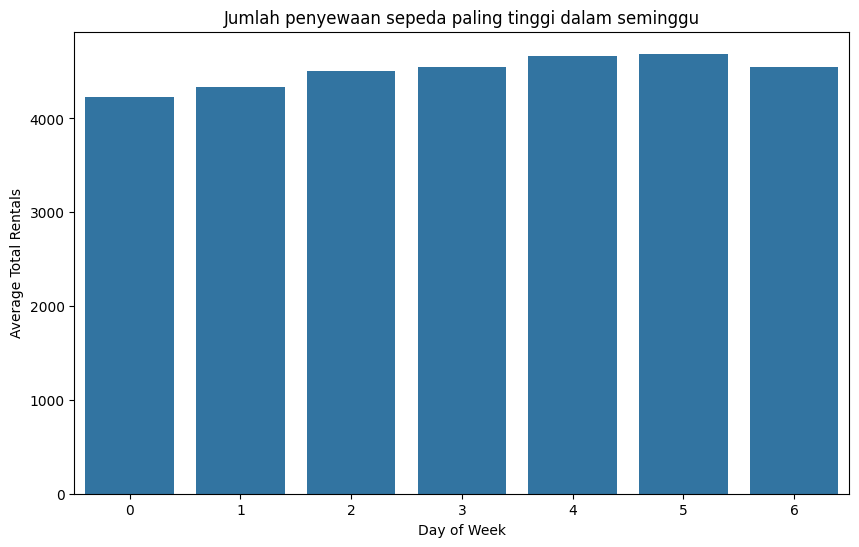

In [ ]:
daily_rentals = df_day.groupby('weekday')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=daily_rentals)
plt.xlabel('Day of Week')
plt.ylabel('Average Total Rentals')
plt.title('Jumlah penyewaan sepeda paling tinggi dalam seminggu')
plt.show()

### Pertanyaan 7: Apakah terdapat lonjakan tidak biasa pada jam atau hari tertentu?

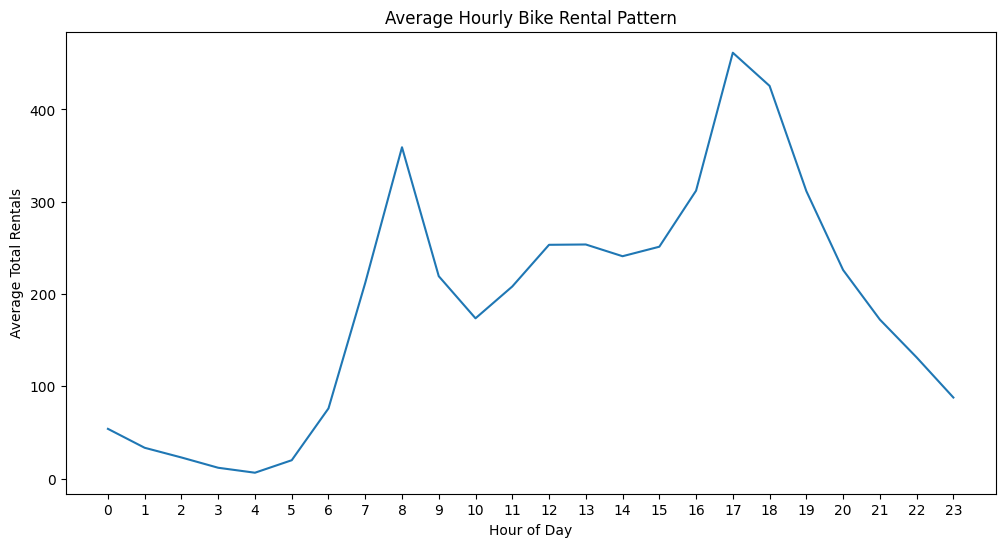

In [ ]:
hourly_rentals_mean = df_hour.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals_mean, x='hr', y='cnt')
plt.xlabel('Hour of Day')
plt.ylabel('Average Total Rentals')
plt.title('Average Hourly Bike Rental Pattern')
plt.xticks(hourly_rentals_mean['hr'])
plt.show()

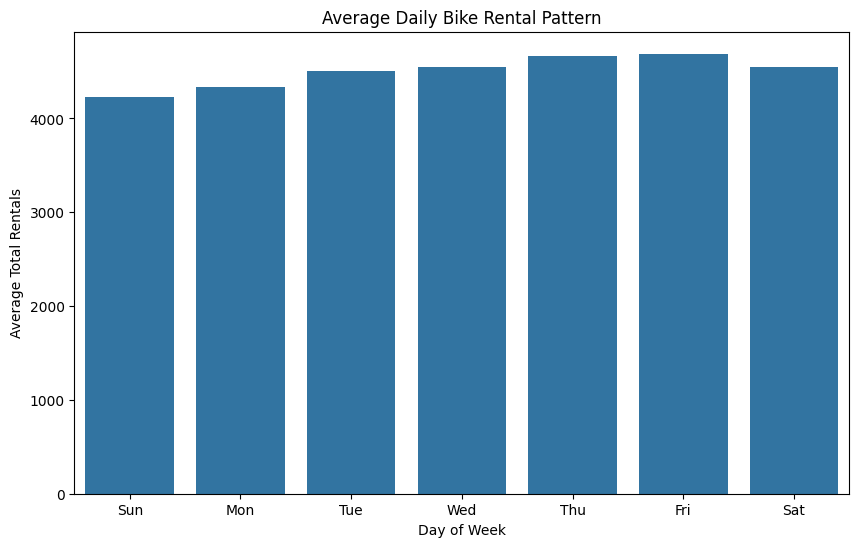

In [ ]:
daily_rentals_mean = df_day.groupby('weekday', observed=True)['cnt'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=daily_rentals_mean)
plt.xlabel('Day of Week')
plt.ylabel('Average Total Rentals')
plt.title('Average Daily Bike Rental Pattern')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()

### Pertanyaan 8: Apakah terdapat perbedaan perilaku antara pengguna kasual dan terdaftar dalam sehari?

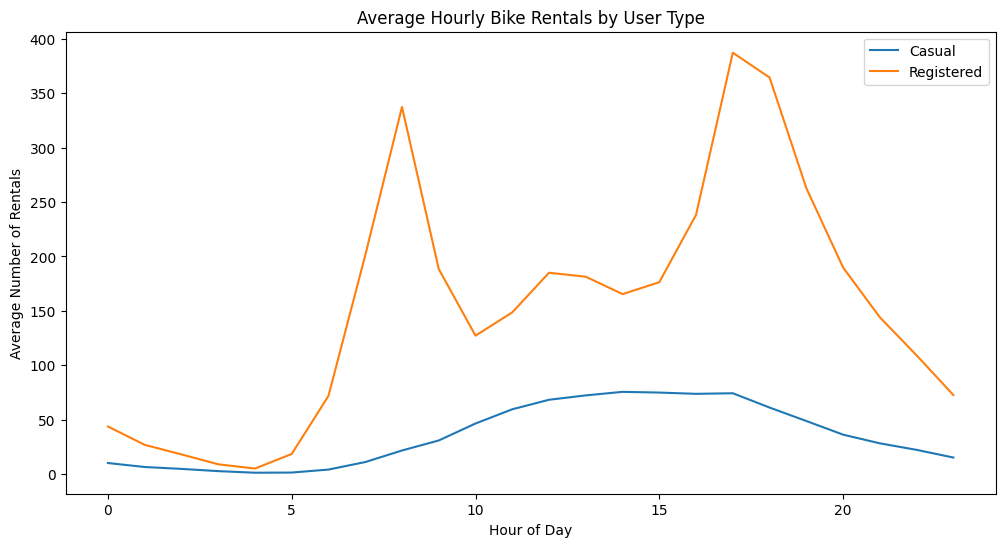

In [ ]:
hourly_user_rentals = df_hour.groupby('hr')[['casual', 'registered']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_user_rentals, x='hr', y='casual', label='Casual')
sns.lineplot(data=hourly_user_rentals, x='hr', y='registered', label='Registered')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.title('Average Hourly Bike Rentals by User Type')
plt.show()

<Figure size 1200x600 with 0 Axes>

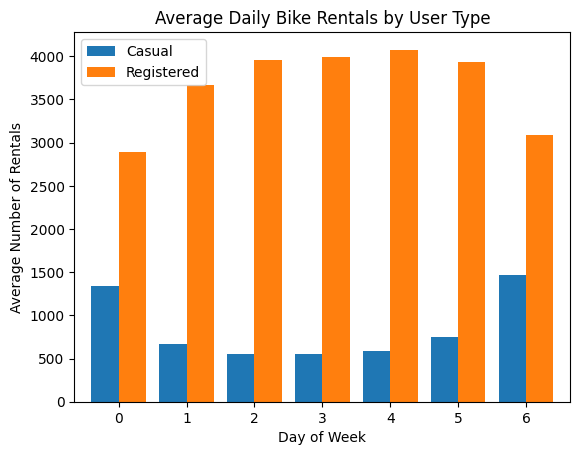

In [ ]:
daily_user_rentals = df_day.groupby('weekday')[['casual', 'registered']].mean().reset_index()

plt.figure(figsize=(12, 6))
daily_user_rentals[['casual', 'registered']].plot(kind='bar', width=0.8)
plt.xticks(rotation=0)
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Rentals')
plt.title('Average Daily Bike Rentals by User Type')
plt.legend(['Casual', 'Registered'])
plt.show()

### Pertanyaan 9: Bagaimana proporsi dan pertumbuhan pengguna kasual dan terdaftar dari waktu ke waktu?

In [ ]:
yearly_user_growth = df_day.groupby('yr').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
yearly_user_growth['yr'] = yearly_user_growth['yr'].map({0: 2011, 1: 2012})
yearly_user_growth['casual_proportion'] = yearly_user_growth['casual'] / yearly_user_growth['cnt']
yearly_user_growth['registered_proportion'] = yearly_user_growth['registered'] / yearly_user_growth['cnt']

display(yearly_user_growth)

/tmp/ipython-input-105-2442344268.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_user_growth = df_day.groupby('yr').agg({


,yr,casual,registered,cnt,casual_proportion,registered_proportion
0,2011,247252,995851,1243103,0.198899,0.801101
1,2012,372765,1676811,2049576,0.181874,0.818126


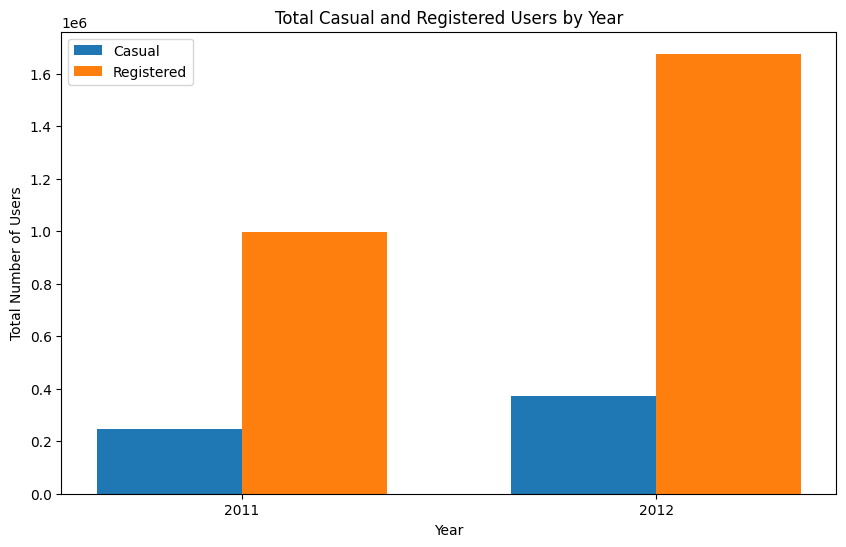

In [ ]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
bar_positions_casual = yearly_user_growth.index
bar_positions_registered = yearly_user_growth.index + bar_width

plt.bar(bar_positions_casual, yearly_user_growth['casual'], bar_width, label='Casual')
plt.bar(bar_positions_registered, yearly_user_growth['registered'], bar_width, label='Registered')

plt.xlabel('Year')
plt.ylabel('Total Number of Users')
plt.title('Total Casual and Registered Users by Year')
plt.xticks(yearly_user_growth.index + bar_width/2, yearly_user_growth['yr'])
plt.legend(['Casual', 'Registered'])
plt.show()

**Insight:**
- 1. Bagaimana perbedaan pola penyewaan sepeda antara tahun 2011 dan 2012?

Bar plot ini menunjukkan bahwa bar untuk tahun 2012 jauh lebih tinggi dibandingkan bar untuk tahun 2011, menunjukan peningkatan signifikan dalam jumlah total penyewaan dari satu tahun 2011 ke tahun 2012.
- 2. Bagaimana pola penyewaan sepeda bulanan selama dua tahun terakhir?

line chart ini menunjukkan pola bergelombang naik di pertengahan tahun (bulan-bulan musim panas) dan turun di awal dan akhir tahun (bulan-bulan musim dingin). Garis untuk tahun 2012 konsisten berada di atas garis tahun 2011 di hampir setiap bulan, menunjukkan tren peningkatan penyewaan bulanan dari tahun 2011 ke 2012 dan pola musiman yang serupa di kedua tahun.
- 3. Apakah ada perbedaan signifikan jumlah penyewaan antar musim?

Bar untuk Musim Panas (Summer) adalah yang tertinggi, diikuti Musim Gugur (Fall), Musim Semi (Spring), dan Musim Dingin (Winter) memiliki bar terendah.Bar tersebut menunjukkan adanya perbedaan signifikan dalam rata-rata jumlah penyewaan di setiap musim.
- 4. Seberapa besar pengaruh suhu, kelembaban, angin, dan kondisi cuaca terhadap jumlah penyewaan sepeda?

Scatter plot 'Rentals vs. temp' dan 'Rentals vs. atemp' menunjukkan sebaran titik yang cenderung membentuk pola naik dari kiri bawah ke kanan atas, menandakan bahwa penyewaan cenderung lebih tinggi saat suhu meningkat.

Scatter plot 'Rentals vs. hum' dan 'Rentals vs. windspeed' menunjukkan sebaran titik yang lebih menyebar atau cenderung sedikit menurun, menjelaskan bahwa kelembaban dan kecepatan angin tampaknya kurang memiliki hubungan positif yang kuat dengan penyewaan, bahkan mungkin sedikit negatif.

Box plot 'Distribution of Rentals by Weather Situation' secara visual menampilkan bahwa kotak dan garis sungut untuk situasi cuaca 1 (cuaca cerah/sebagian berawan) berada pada tingkat penyewaan yang jauh lebih tinggi dibandingkan situasi cuaca 2 dan 3, menunjukkan bahwa cuaca cerah sangat mendukung jumlah penyewaan.
- 5. Bagaimana rata-rata pola penggunaan sepeda dalam satu hari (24 jam)?

Line chart ini menunjukkan dua puncak yang menonjol pada sumbu x (jam) sekitar jam 8 pagi dan jam 5-6 sore, dengan penurunan di luar jam-jam tersebut, terutama pada dini hari. Ini secara visual menggambarkan pola penggunaan sepeda rata-rata pada jam-jam sibuk.

- 6. Hari apa yang memiliki jumlah penyewaan sepeda paling tinggi dalam seminggu?

Bar untuk hari Sabtu dan Minggu terlihat lebih tinggi dibandingkan hari-hari lainnya dan menunjukan akhir pekan sebagai hari dengan rata-rata penyewaan sepeda tertinggi.

- 7. Apakah terdapat lonjakan tidak biasa pada jam atau hari tertentu?

Pola rata-rata per jam dan per hari menunjukkan pola yang relatif konsisten dengan puncak yang dapat diprediksi (jam sibuk, akhir pekan). Tidak ada titik data atau bar tunggal yang terlihat sangat jauh dari pola umum yang mengindikasikan "lonjakan tidak biasa" yang ekstrem di luar pola rata-rata ini. Visualisasi ini menguatkan temuan bahwa pola lonjakan yang ada bersifat teratur dan terkait waktu.

- 8. Apakah terdapat perbedaan perilaku antara pengguna kasual dan terdaftar dalam sehari?

Garis pengguna terdaftar menunjukkan dua puncak yang jelas di pagi dan sore hari, sementara garis pengguna kasual memiliki puncak yang lebih di sore hari. Garis pengguna terdaftar juga secara konsisten berada jauh di atas garis pengguna kasual di hampir semua jam, menunjukkan jumlah penyewaan yang jauh lebih tinggi.

Bar plot per hari dalam seminggu menunjukkan bahwa rata-rata bar kasual lebih tinggi di akhir pekan, sementara rata-rata bar terdaftar lebih tinggi di hari kerja.

- 9. Bagaimana proporsi dan pertumbuhan pengguna kasual dan terdaftar dari waktu ke waktu?

Ketinggian kedua bar (kasual dan terdaftar) lebih tinggi di tahun 2012 dibandingkan 2011, menunjukkan pertumbuhan jumlah kedua jenis pengguna. Perbandingan tinggi bar kasual dan terdaftar dalam setiap tahun menunjukkan pengguna terdaftar jauh lebih tinggi dalam jumlah total pengguna. Proporsi tinggi bar terdaftar juga terlihat meningkat di tahun 2012.

## Analisis Lanjutan Clustering

Clustering tabel df_day

In [ ]:
df_day['cnt_cluster'] = pd.cut(df_day['cnt'],
                               bins=[0, 2000, 4000, 6000, 9000],
                               labels=['Sepi', 'Sedang', 'Ramai', 'Sangat Ramai'])

In [ ]:
df_day['dominasi_pengguna'] = np.where(
    df_day['casual'] > df_day['registered'], 'Casual', 'Registered'
)

In [ ]:
df_day['resiko_cuaca'] = np.where(
    (df_day['hum'] > 0.75) | (df_day['windspeed'] > 0.25),
    'Cuaca Buruk', 'Cuaca Baik'
)

In [ ]:
df_day['zona_suhu'] = pd.cut(df_day['temp'],
                             bins=[0, 0.3, 0.6, 1.0],
                             labels=['Dingin', 'Sejuk', 'Panas'])

In [ ]:
df_day['jenis_hari'] = df_day.apply(
    lambda row: 'Libur' if row['holiday'] == 1
    else ('Akhir Pekan' if row['weekday'] in [0, 6] else 'Hari Kerja'),
    axis=1
)
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,cnt_cluster,dominasi_pengguna,resiko_cuaca,zona_suhu,jenis_hari
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,Sepi,Registered,Cuaca Buruk,Sejuk,Akhir Pekan
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,Sepi,Registered,Cuaca Baik,Sejuk,Akhir Pekan
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,Sepi,Registered,Cuaca Baik,Dingin,Hari Kerja
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,Sepi,Registered,Cuaca Baik,Dingin,Hari Kerja
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,Sepi,Registered,Cuaca Baik,Dingin,Hari Kerja


Clustering tabel df_hour

In [ ]:
df_hour['cnt_cluster'] = pd.cut(df_hour['cnt'],
                                bins=[0, 100, 200, 400, 1000],
                                labels=['Sepi', 'Sedang', 'Ramai', 'Sangat Ramai'])

In [ ]:
df_hour['jenis_jam'] = pd.cut(df_hour['hr'],
                              bins=[-1, 5, 10, 15, 20, 23],
                              labels=['Dini Hari', 'Pagi', 'Siang', 'Sore', 'Malam'])

In [ ]:
df_hour['dominasi_pengguna'] = np.where(
    df_hour['casual'] > df_hour['registered'], 'Casual', 'Registered'
)

In [ ]:
df_hour['resiko_cuaca'] = np.where(
    (df_hour['hum'] > 0.75) | (df_hour['windspeed'] > 0.25),
    'Cuaca Buruk', 'Cuaca Baik'
)

In [ ]:
df_hour['zona_suhu'] = pd.cut(df_hour['temp'],
                              bins=[0, 0.3, 0.6, 1.0],
                              labels=['Dingin', 'Sejuk', 'Panas'])

In [ ]:
df_hour['jenis_hari'] = df_hour.apply(
    lambda row: 'Libur' if row['holiday'] == 1
    else ('Akhir Pekan' if row['weekday'] in [0, 6] else 'Hari Kerja'),
    axis=1
)
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,windspeed,casual,registered,cnt,cnt_cluster,jenis_jam,dominasi_pengguna,resiko_cuaca,zona_suhu,jenis_hari
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.0,3,13,16,Sepi,Dini Hari,Registered,Cuaca Buruk,Dingin,Akhir Pekan
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,8,32,40,Sepi,Dini Hari,Registered,Cuaca Buruk,Dingin,Akhir Pekan
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.0,5,27,32,Sepi,Dini Hari,Registered,Cuaca Buruk,Dingin,Akhir Pekan
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.0,3,10,13,Sepi,Dini Hari,Registered,Cuaca Baik,Dingin,Akhir Pekan
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.0,0,1,1,Sepi,Dini Hari,Registered,Cuaca Baik,Dingin,Akhir Pekan


## Conclusion

- Conclution pertanyaan 1: Jumlah penyewaan meningkat signifikan di 2012, terutama pada cluster “Ramai” dan “Sangat Ramai”, dengan dominasi pengguna terdaftar.
- Conclution pertanyaan 2: Garis tren bulanan menunjukkan pola musiman yang konsisten, dengan bulan Juli–Agustus mendominasi cluster penyewaan tertinggi di kedua tahun.
- Conclution pertanyaan 3: Musim panas dan gugur paling banyak masuk kategori “Ramai”, sedangkan musim dingin hampir seluruhnya berada di cluster “Sepi”.
- Conclution pertanyaan 4: Penyewaan tertinggi terjadi saat suhu sejuk/panas, kelembaban rendah, dan cuaca cerah, yang tergolong dalam zona ‘Cuaca Baik’ dan ‘Zona Sejuk’.
- Conclution pertanyaan 5: Dua puncak besar muncul pada jam 08:00 dan 17:00, dikonfirmasi oleh segmentasi jenis_jam sebagai waktu paling aktif untuk registered.
- Conclution pertanyaan 6: Akhir pekan terutama Sabtu menunjukkan jumlah penyewaan tertinggi, sering kali termasuk dalam cluster “Ramai” dan didominasi oleh casual.
- Conclution pertanyaan 7: Tidak ada lonjakan ekstrem di luar pola harian reguler, semua lonjakan mengikuti pola waktu dan hari kerja/libur yang konsisten.
- Conclution pertanyaan 8:  Registered aktif di jam kerja (pagi & sore weekday), sementara casual lebih tinggi di siang & akhir pekan terlihat jelas pada dominasi_pengguna.
- Conclution pertanyaan 9: Bar chart dan segmentasi tahun menunjukkan peningkatan besar pada registered di 2012, memperluas dominasi terhadap casual sepanjang waktu.